## COMSC230 - FINAL PRESENTATION DATA ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm  # statsmodels is used for statistical modeling (e.g., linear regression, time series analysis)
import random
from statsmodels.tsa.seasonal import seasonal_decompose

Read data from the CSV file into a DataFrame and display

In [2]:
# Load the data
data = '/Users/brianbrimner/Downloads/Sales_Transactions_Dataset_Weekly.csv'
product_data = pd.read_csv(data)

# Select all rows and the first 53 columns (Product_Code + 52 weeks of sales data)
product_data_52_weeks = product_data.iloc[:, :53]

In [3]:
# Define lists of adjectives and product types
adjectives = [
    "Ultra", "Smart", "Eco", "Power", "Comfy", "Flexi", "Mega", "Bright", "Quick", "Max",
    "Silent", "Fresh", "Speed", "Cloud", "Pure", "Safe", "Glow", "Hyper", "Active", "Clean",
    "Pro", "Fit", "Charge", "Aqua", "Super", "Cool", "Warm", "Grip", "Auto", "Travel", "Secure"
]

product_types = [
    "Towels", "Speaker", "Bottle", "Charger", "Sneakers", "Hammer", "Air Purifier", "Desk Lamp",
    "Oven", "Umbrella", "Keyboard", "Monitor", "Vacuum", "Blender", "Kettle", "Power Bank",
    "Headphones", "Yoga Mat", "Fan", "Lockbox", "Water Filter", "Coffee Maker", "Camera", "Cooler",
    "Bike", "Hair Dryer", "Backpack", "Knife Set", "Gloves", "Dishwasher", "Blanket", "Flashlight",
    "Travel Cup", "Washing Machine", "Helmet", "Skateboard", "Mixer", "Pillow", "Dumbbells",
    "Alarm", "Mouse", "Router", "Clock", "Jacket", "Socks", "Phone Case", "Sunglasses", "Fridge",
    "Generator", "Speakers", "Car Charger", "Resistance Bands", "Bulbs", "Food Processor", "Lock",
    "Wireless Charger", "Fitness Tracker", "Lamp", "Shaver", "Torch", "Humidifier", "Water Flask",
    "Cake Pan", "Cooler Box", "Diffuser", "Ladder", "Surfboard", "Paddleboard", "Dish Soap",
    "Iron", "Bag", "Dish Soap", "Thermostat", "Air Conditioner", "Garage Opener"
]

In [4]:
# Generate unique product names by combining adjectives and product types
unique_product_names = set()
while len(unique_product_names) < len(product_data_52_weeks):
    adjective = random.choice(adjectives)
    product_type = random.choice(product_types)
    product_name = f"{adjective} {product_type}"
    unique_product_names.add(product_name)

# Convert the set to a list
unique_product_names_list = list(unique_product_names)

# Assign the generated names to the Product_Code column
product_data_52_weeks['Product_Code'] = unique_product_names_list[:len(product_data_52_weeks)]


In [5]:
# Display all rows and columns
pd.set_option('display.max_rows', 819)  # Adjust to show all rows
pd.set_option('display.max_columns', 53)  # Show all columns

# Display the DataFrame
product_data_52_weeks


,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,Ultra Sneakers,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10
1,Grip Sunglasses,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0
2,Ultra Dish Soap,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7
3,Clean Bike,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8
4,Travel Hair Dryer,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9
5,Warm Hair Dryer,3,3,2,7,6,3,8,6,6,3,1,1,5,4,3,5,3,5,10,8,4,9,7,5,4,2,1,3,2,4,0,3,2,11,2,1,4,4,3,2,5,4,4,2,4,3,6,5,3,3,10,6
6,Clean Thermostat,4,8,3,7,8,7,2,3,10,3,5,2,3,4,5,3,7,10,0,3,7,5,1,5,7,5,2,4,3,1,3,2,2,4,2,6,4,5,1,3,5,8,2,3,3,6,2,6,2,4,2,1
7,Glow Kettle,8,6,10,9,6,8,7,5,10,10,8,8,15,9,5,11,10,7,13,9,12,11,5,11,11,12,3,10,12,9,9,10,8,9,8,9,15,6,7,8,3,9,10,14,4,8,8,6,7,4,9,9
8,Cool Dish Soap,14,9,10,7,11,15,12,7,13,12,15,15,16,10,9,9,13,8,10,18,18,17,10,16,14,10,4,7,7,10,3,13,9,7,9,8,7,9,15,8,9,8,11,5,13,3,7,7,10,12,7,13
9,Secure Torch,22,19,19,29,20,16,26,20,24,20,31,22,23,19,15,19,22,23,20,33,16,23,23,16,25,27,12,15,15,11,14,29,23,12,16,9,23,22,15,18,13,17,14,17,11,24,13,16,18,23,18,20


In [6]:
# Calculate the average sales for each product across all 52 weeks
average_sales_per_product = product_data_52_weeks.drop(columns='Product_Code').mean(axis=1)

# Descriptive statistics for the average sales of each product
average_sales_description = average_sales_per_product.describe()
print(average_sales_description)


count    811.000000
mean       8.898961
std       11.420443
min        0.019231
25%        0.403846
50%        3.826923
75%       11.057692
max       42.692308
dtype: float64


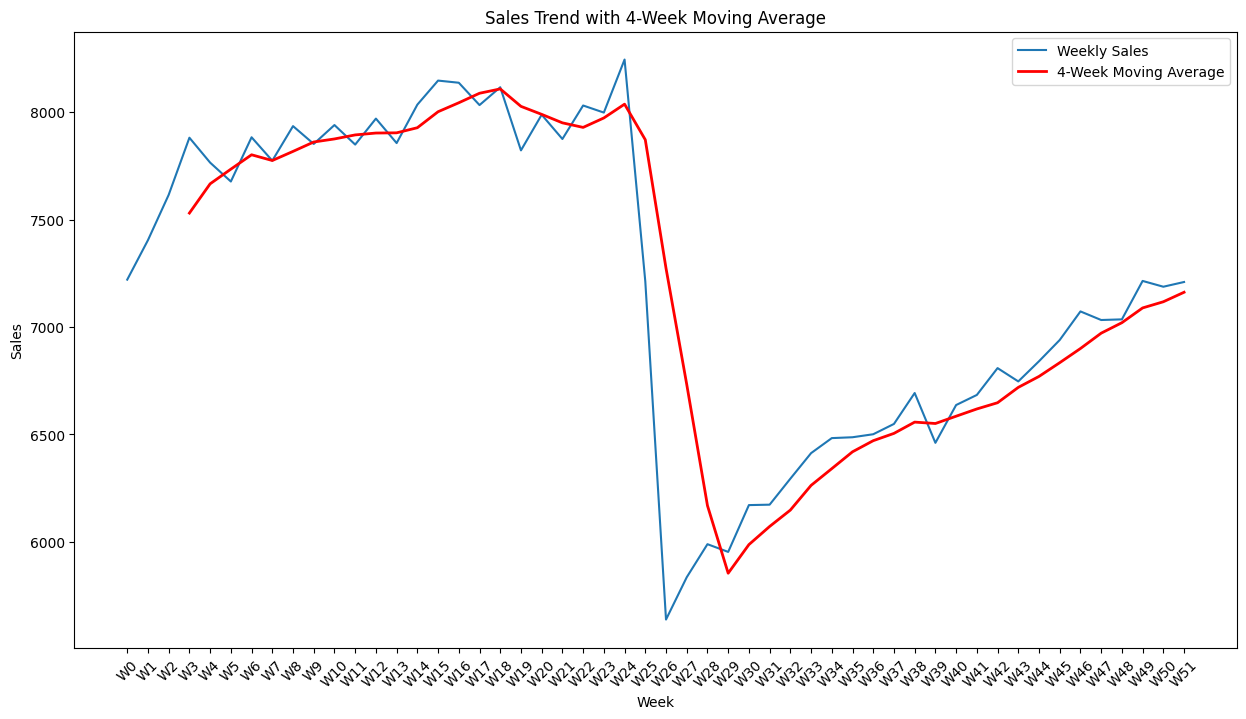

In [18]:
# Calculate a 4-week moving average for better trend visualization
moving_average = total_sales_by_week.rolling(window=4).mean()

# Plot the moving average along with raw sales
plt.figure(figsize=(15, 8))
sns.lineplot(x=total_sales_by_week.index, y=total_sales_by_week.values, label='Weekly Sales')
sns.lineplot(x=moving_average.index, y=moving_average.values, label='4-Week Moving Average', color='red', linewidth=2)
plt.title('Sales Trend with 4-Week Moving Average')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()


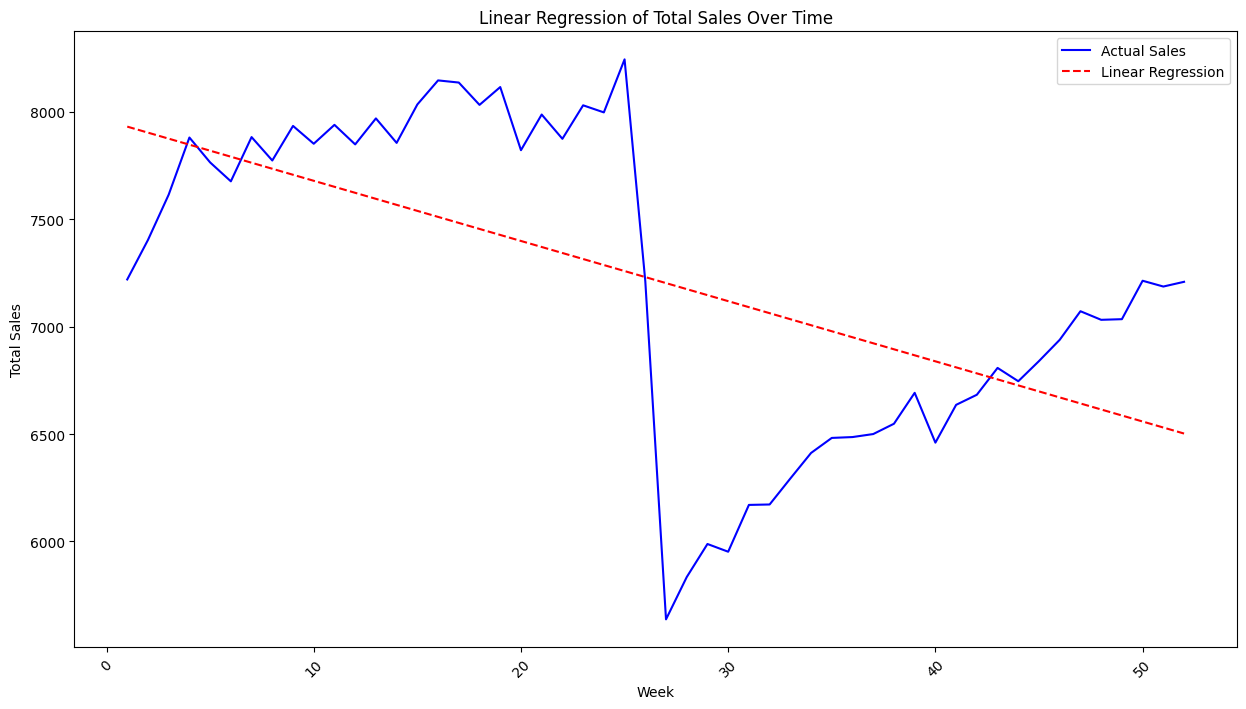

Linear regression coefficient (slope): -28.027960385896005
Linear regression intercept: 7959.798642533937


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Sum sales across all products for each week (this is the dependent variable)
total_sales_by_week = product_data_52_weeks.drop(columns='Product_Code').sum(axis=0)

# Prepare the independent variable (week numbers)
weeks = np.array(range(1, 53)).reshape(-1, 1)  # Weeks 1 to 52

# Prepare the dependent variable (total sales for each week)
sales = total_sales_by_week.values.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(weeks, sales)

# Predict sales using the model
sales_pred = model.predict(weeks)

# Plot the original data and the regression line
plt.figure(figsize=(15, 8))
plt.plot(weeks, sales, label='Actual Sales', color='blue')
plt.plot(weeks, sales_pred, label='Linear Regression', color='red', linestyle='--')
plt.title('Linear Regression of Total Sales Over Time')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Print the regression coefficients
print(f'Linear regression coefficient (slope): {model.coef_[0][0]}')
print(f'Linear regression intercept: {model.intercept_[0]}')


In [9]:
# Descriptive statistics for individual product sales across weeks
product_sales_stats = product_data_52_weeks.iloc[:, 1:].describe().T
product_sales_stats['skewness'] = product_data_52_weeks.iloc[:, 1:].skew()
product_sales_stats['kurtosis'] = product_data_52_weeks.iloc[:, 1:].kurt()

# Display the descriptive statistics
product_sales_stats


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
W0,811.0,8.902589,12.067163,0.0,0.0,3.0,12.0,54.0,1.497117,1.155504
W1,811.0,9.129470,12.564766,0.0,0.0,3.0,12.0,53.0,1.548352,1.288127
W2,811.0,9.389642,13.045073,0.0,0.0,3.0,12.0,56.0,1.582913,1.403143
W3,811.0,9.717633,13.553294,0.0,0.0,4.0,13.0,59.0,1.577207,1.342509
W4,811.0,9.574599,13.095765,0.0,0.0,4.0,13.0,61.0,1.565285,1.442023
W5,811.0,9.466091,12.823195,0.0,0.0,3.0,12.5,52.0,1.512961,1.200865
W6,811.0,9.720099,13.347375,0.0,0.0,4.0,13.0,56.0,1.567562,1.374055
W7,811.0,9.585697,13.049138,0.0,0.0,4.0,12.5,62.0,1.587119,1.545843
W8,811.0,9.784217,13.550237,0.0,0.0,4.0,13.0,63.0,1.584782,1.447244
W9,811.0,9.681874,13.137916,0.0,0.0,4.0,13.0,52.0,1.492366,1.011819


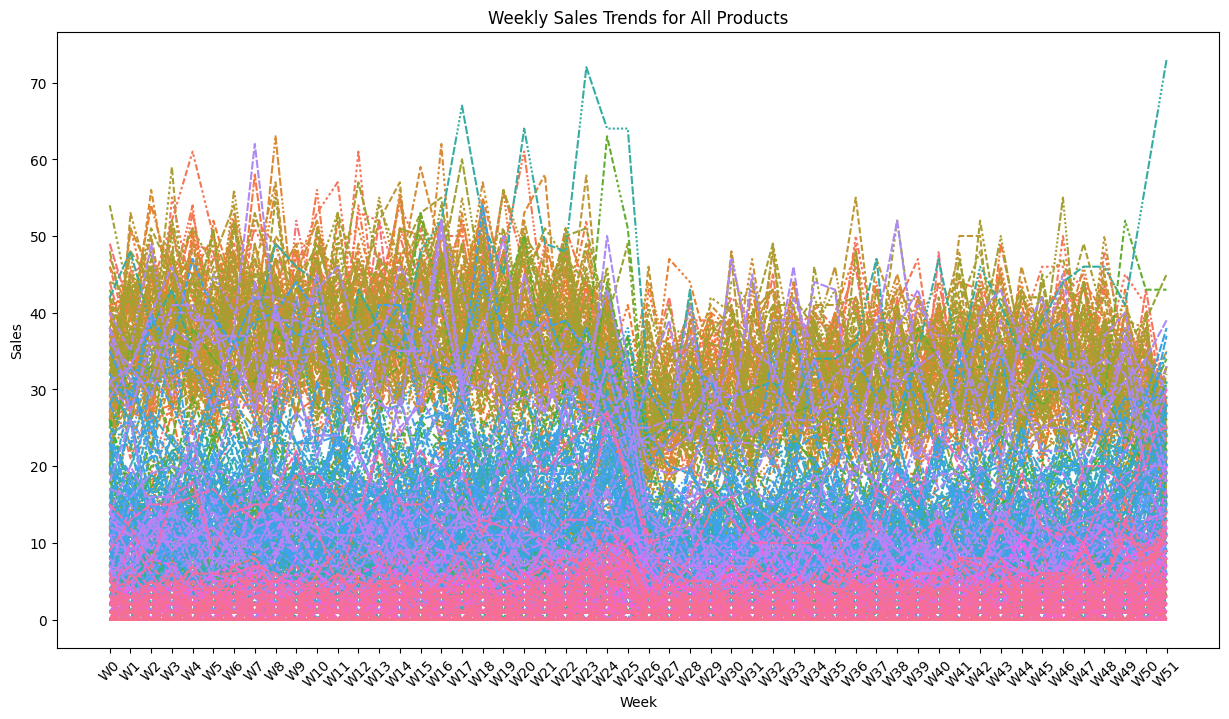

In [10]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=product_data_52_weeks.set_index('Product_Code').T, legend=False)
plt.title('Weekly Sales Trends for All Products')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


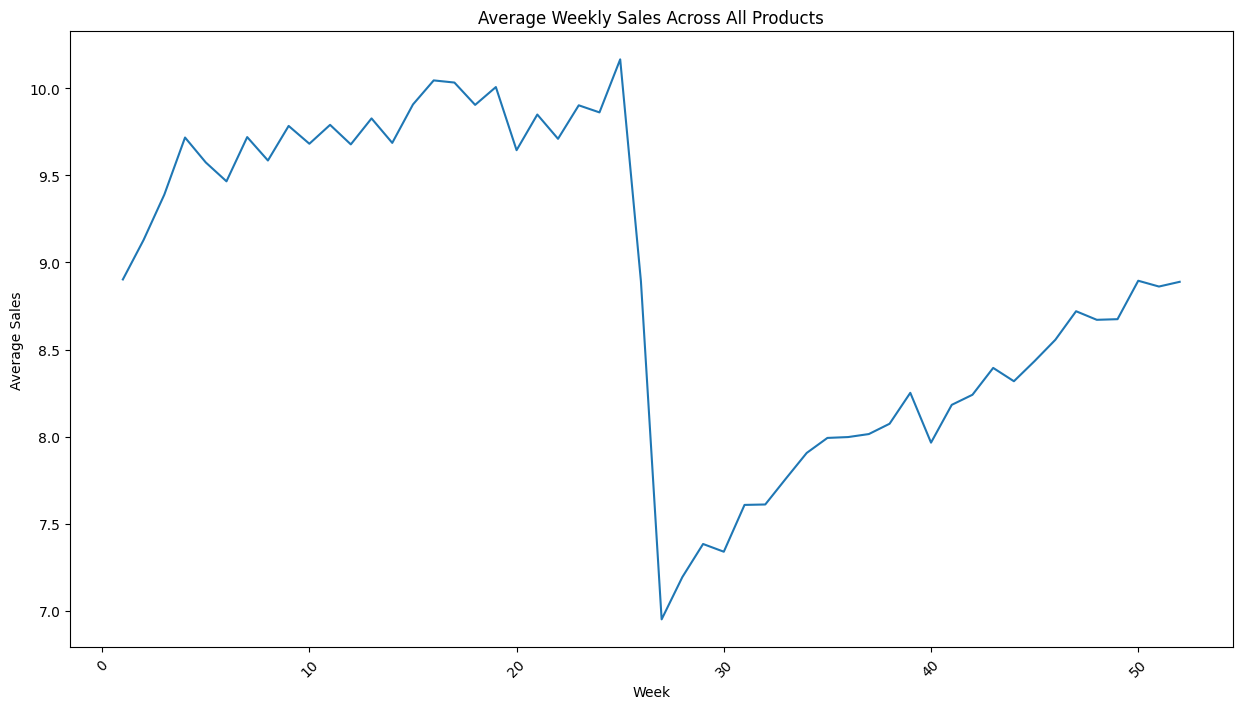

In [11]:
# Calculate the average sales across all products for each week
average_weekly_sales = product_data_52_weeks.iloc[:, 1:].mean()

# Plot the average sales for each week
plt.figure(figsize=(15, 8))
sns.lineplot(x=range(1, 53), y=average_weekly_sales)
plt.title('Average Weekly Sales Across All Products')
plt.xlabel('Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


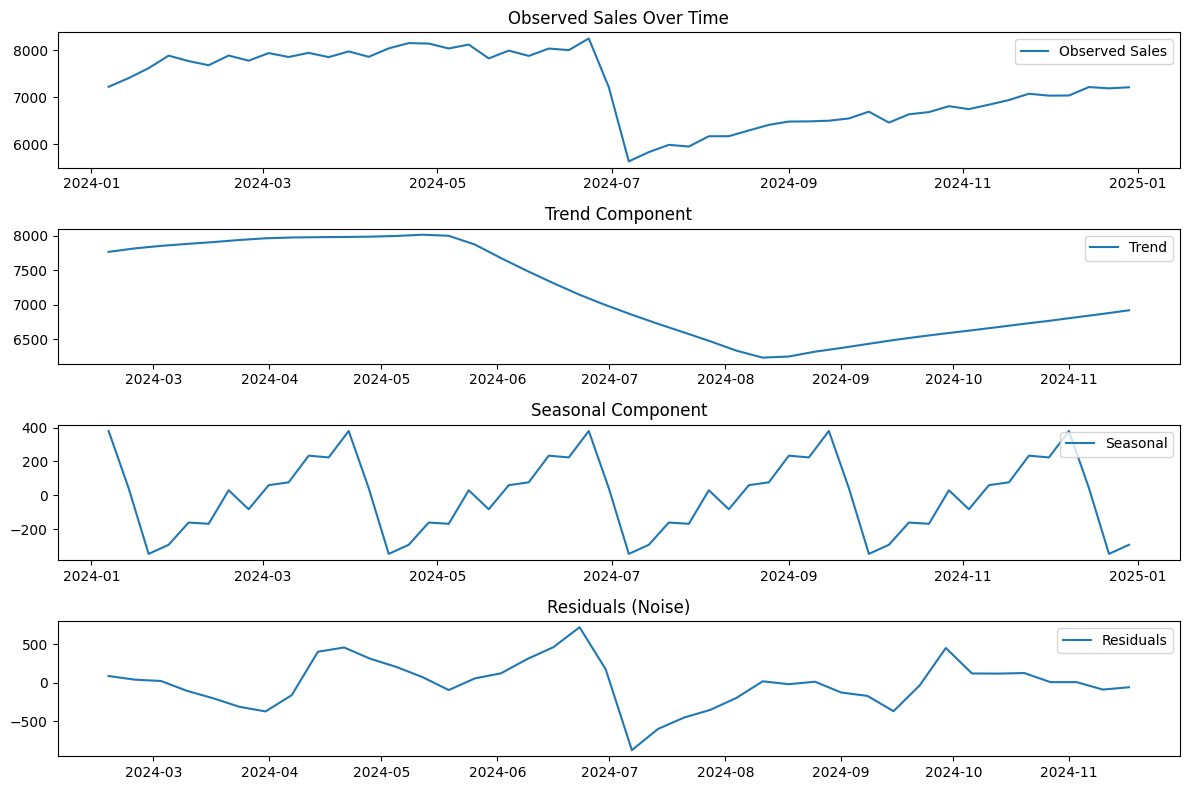

In [16]:
# Step 1: Aggregate the sales data for all products across each week
sales_data = product_data_52_weeks.drop(columns='Product_Code')
weekly_sales = sales_data.sum(axis=0)

# Step 2: Create a time series with weeks as index
weeks = pd.date_range(start="2024-01-01", periods=52, freq="W")
weekly_sales.index = weeks

# Step 3: Decompose the time series into trend, seasonal, and residual components
# Set period=12 for monthly seasonality or period=4 for quarterly
decomposition = seasonal_decompose(weekly_sales, model='additive', period=12) 

# Step 4: Plot the decomposition results
plt.figure(figsize=(12, 8))

# Observed sales (raw data)
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed Sales')
plt.title('Observed Sales Over Time')
plt.legend()

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

# Residuals (Noise)
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.title('Residuals (Noise)')
plt.legend()

plt.tight_layout()
plt.show()


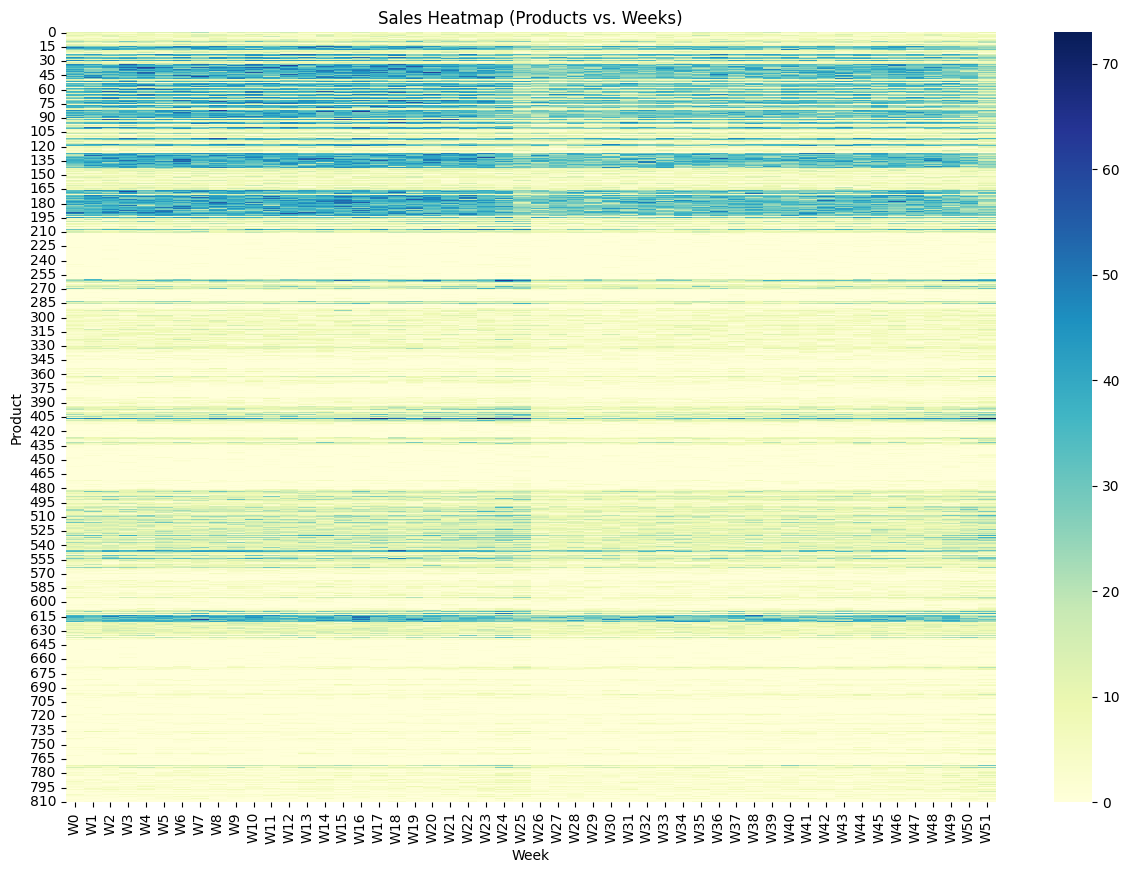

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(sales_data, cmap='YlGnBu', annot=False)
plt.title('Sales Heatmap (Products vs. Weeks)')
plt.xlabel('Week')
plt.ylabel('Product')
plt.show()
